In [1]:
%matplotlib inline

In [2]:
import sys
!{sys.executable} -m pip install pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# data loading
df17 = pd.read_csv('queens2017.csv')

In [5]:
# data cleaning
df17.columns = df17.columns.str.replace(' ', '_')
df17.columns = df17.columns.str.replace('\n', '')
df17 = df17[df17['ZIP_CODE'] != 0]
df17['SALE_PRICE'] = df17['SALE_PRICE'].str.replace(',','').astype(int)

In [6]:
# statistics
df17_stat = df17.groupby(df17['ZIP_CODE']).mean()['SALE_PRICE']

Text(3,64,'QUEENS AVERAGE SOLD PRICE IN 2017 PER ZIP CODE ')

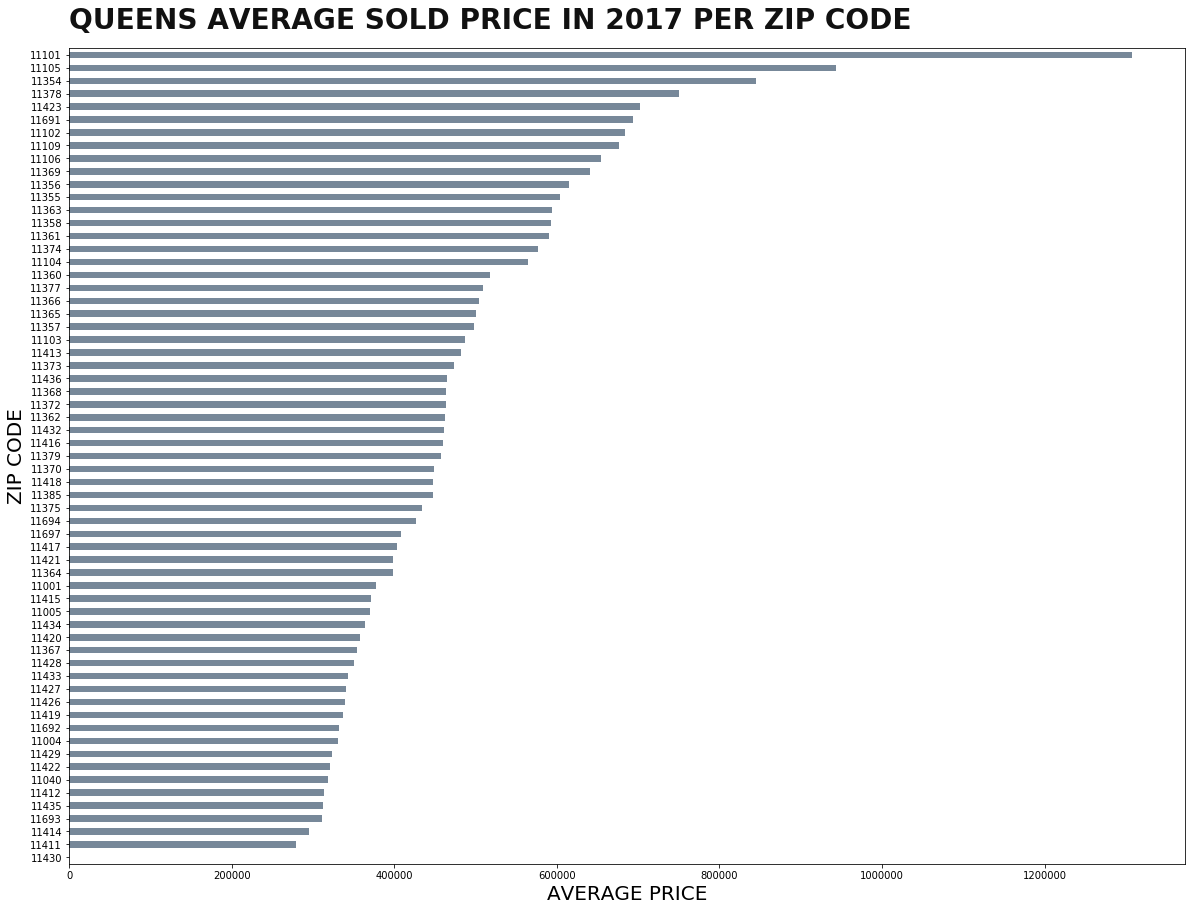

In [11]:
# basic plot
df17.groupby(df17['ZIP_CODE'])['SALE_PRICE'].mean().sort_values(ascending = True).plot(kind='barh', color='lightslategray')
plt.rcParams["figure.figsize"] = [20,15]
plt.xlabel('AVERAGE PRICE',fontsize=20)
plt.ylabel('ZIP CODE',fontsize=20)
plt.text(x=3, y=64, s="QUEENS AVERAGE SOLD PRICE IN 2017 PER ZIP CODE ", fontsize=28, weight='bold',alpha=.93)

In [8]:
df16 = pd.read_csv('queens2016.csv')
df16.columns = df16.columns.str.replace(' ', '_')
df16.columns = df16.columns.str.replace('\n', '')
df16 = df16[df16['ZIP_CODE'] != 0]
df16 = df16[df16['SALE_PRICE'].str.contains('-') == False]
df16['SALE_PRICE'] = df16['SALE_PRICE'].str.replace(',','').astype(int)
df16_stat = df16.groupby(df16['ZIP_CODE']).mean()['SALE_PRICE']

Text(3,64,'QUEENS AVERAGE SOLD PRICE IN 2016 PER ZIP CODE ')

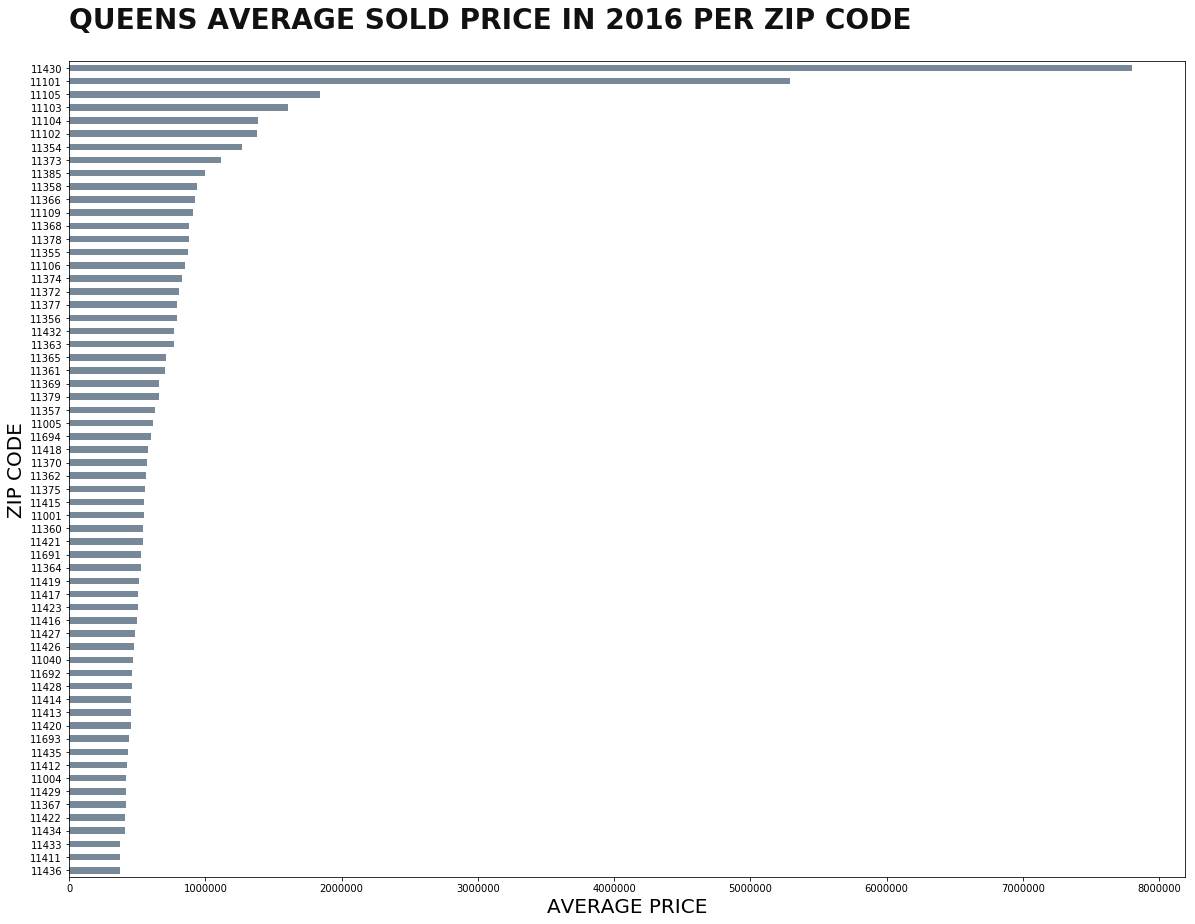

In [13]:
# basic plot
df16.groupby(df16['ZIP_CODE'])['SALE_PRICE'].mean().sort_values(ascending = True).plot(kind='barh', color='lightslategray')
plt.rcParams["figure.figsize"] = [20,15]
plt.xlabel('AVERAGE PRICE',fontsize=20)
plt.ylabel('ZIP CODE',fontsize=20)
plt.text(x=3, y=64, s="QUEENS AVERAGE SOLD PRICE IN 2016 PER ZIP CODE ", fontsize=28, weight='bold',alpha=.93)

In [10]:
df_grand_stat = pd.concat([df16_stat, df17_stat], axis=1, join='outer')
df_grand_stat.columns = ['q16', 'q17']
# consolidate zip code into a column
df_grand_stat = df_grand_stat.reset_index()
df_grand_stat_transpose = df_grand_stat.transpose()